In [1]:
import pandas as pd 

#### Analysis of data quality

In [2]:
simfin_income = pd.read_csv("simfin_data/us-income-annual.csv", sep=";")

In [3]:
simfin_income.Ticker.value_counts()

Ticker
SPTN     6
TDG      6
A        5
MESA     5
METC     5
        ..
CLUBQ    1
OCSL     1
OCLN     1
KD       1
TMC      1
Name: count, Length: 4397, dtype: int64

In [4]:
# Group by 'Ticker' and filter groups with no NaN values in any row
companies_with_no_nans = simfin_income.groupby('Ticker').filter(
    lambda group: not group.isnull().any().any()
)

# Extract unique tickers
unique_tickers = companies_with_no_nans['Ticker'].unique()

print("Tickers with no NaNs across all rows:")
print(unique_tickers)


Tickers with no NaNs across all rows:
['CE' 'COHU' 'CTA-PB' 'CTVA' 'CUB' 'DD' 'IAC' 'LGND' 'MDRX' 'NEM' 'NUAN'
 'TLRA']


#### Analysis of how many entries per comapyn

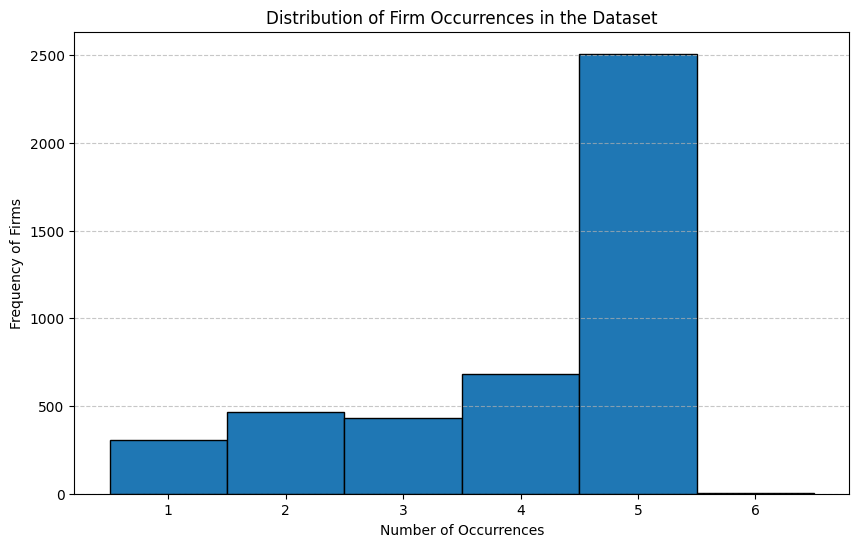

In [5]:
import matplotlib.pyplot as plt

# Assuming the Ticker counts are already calculated as a Series
ticker_counts = simfin_income['Ticker'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(ticker_counts, bins=range(1, ticker_counts.max() + 2), edgecolor='black', align='left')
plt.title("Distribution of Firm Occurrences in the Dataset")
plt.xlabel("Number of Occurrences")
plt.ylabel("Frequency of Firms")
plt.xticks(range(1, ticker_counts.max() + 1))  # Set x-ticks for each occurrence count
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [6]:
# Count occurrences of each Ticker
ticker_counts = simfin_income['Ticker'].value_counts()

# Identify Tickers that occur exactly 5 times
tickers_with_5_occurrences = ticker_counts[ticker_counts == 5].index

# Filter the dataset for these Tickers
filtered_dataset = simfin_income[simfin_income['Ticker'].isin(tickers_with_5_occurrences)]

# Display the filtered dataset
print(filtered_dataset)


      Ticker  SimFinId Currency  Fiscal Year Fiscal Period Report Date  \
0          A     45846      USD         2019            FY  2019-10-31   
1          A     45846      USD         2020            FY  2020-10-31   
2          A     45846      USD         2021            FY  2021-10-31   
3          A     45846      USD         2022            FY  2022-10-31   
4          A     45846      USD         2023            FY  2023-10-31   
...      ...       ...      ...          ...           ...         ...   
17813   ZYXI    171401      USD         2019            FY  2019-12-31   
17814   ZYXI    171401      USD         2020            FY  2020-12-31   
17815   ZYXI    171401      USD         2021            FY  2021-12-31   
17816   ZYXI    171401      USD         2022            FY  2022-12-31   
17817   ZYXI    171401      USD         2023            FY  2023-12-31   

      Publish Date Restated Date  Shares (Basic)  Shares (Diluted)  ...  \
0       2019-12-19    2021-12-17    

#### Fill Nans

In [7]:
# Select quantitative columns (numeric types)
quantitative_columns = filtered_dataset.select_dtypes(include=['number']).columns

# Fill NaN values in quantitative columns with the column mean (or another method like median)
filtered_dataset[quantitative_columns] = filtered_dataset[quantitative_columns].apply(lambda col: col.fillna(col.mean()))

# Display the updated dataset
print(filtered_dataset)


      Ticker  SimFinId Currency  Fiscal Year Fiscal Period Report Date  \
0          A     45846      USD         2019            FY  2019-10-31   
1          A     45846      USD         2020            FY  2020-10-31   
2          A     45846      USD         2021            FY  2021-10-31   
3          A     45846      USD         2022            FY  2022-10-31   
4          A     45846      USD         2023            FY  2023-10-31   
...      ...       ...      ...          ...           ...         ...   
17813   ZYXI    171401      USD         2019            FY  2019-12-31   
17814   ZYXI    171401      USD         2020            FY  2020-12-31   
17815   ZYXI    171401      USD         2021            FY  2021-12-31   
17816   ZYXI    171401      USD         2022            FY  2022-12-31   
17817   ZYXI    171401      USD         2023            FY  2023-12-31   

      Publish Date Restated Date  Shares (Basic)  Shares (Diluted)  ...  \
0       2019-12-19    2021-12-17    

/var/folders/g1/cbg0y1nj55v4p3lfbkx_dcdh0000gn/T/ipykernel_10302/237202272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset[quantitative_columns] = filtered_dataset[quantitative_columns].apply(lambda col: col.fillna(col.mean()))


In [8]:
filtered_dataset

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
0,A,45846,USD,2019,FY,2019-10-31,2019-12-19,2021-12-17,314000000.0,318000000.0,...,-22000000.0,-38000000.0,9.190000e+08,-1.133451e+08,9.190000e+08,152000000.0,1071000000,1.180225e+08,1071000000,1071000000
1,A,45846,USD,2020,FY,2020-10-31,2020-12-18,2022-12-21,309000000.0,312000000.0,...,-4000000.0,-70000000.0,8.420000e+08,-1.133451e+08,8.420000e+08,-123000000.0,719000000,1.180225e+08,719000000,719000000
2,A,45846,USD,2021,FY,2021-10-31,2021-12-17,2023-12-20,305000000.0,307000000.0,...,13000000.0,-79000000.0,1.360000e+09,-1.133451e+08,1.360000e+09,-150000000.0,1210000000,1.180225e+08,1210000000,1210000000
3,A,45846,USD,2022,FY,2022-10-31,2022-12-21,2024-12-20,304000000.0,307000000.0,...,-114000000.0,-75000000.0,1.504000e+09,-1.133451e+08,1.504000e+09,-250000000.0,1254000000,1.180225e+08,1254000000,1254000000
4,A,45846,USD,2023,FY,2023-10-31,2023-12-20,2024-12-20,294000000.0,296000000.0,...,-11000000.0,-44000000.0,1.339000e+09,-1.133451e+08,1.339000e+09,-99000000.0,1240000000,1.180225e+08,1240000000,1240000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17813,ZYXI,171401,USD,2019,FY,2019-12-31,2020-02-27,2021-02-25,35682900.0,37359300.0,...,-5000.0,-5000.0,1.106100e+07,8.800000e+05,1.194100e+07,-2449000.0,9492000,1.180225e+08,9492000,9492000
17814,ZYXI,171401,USD,2020,FY,2020-12-31,2021-02-25,2022-03-22,37255900.0,38437300.0,...,-19000.0,-19000.0,1.023000e+07,-7.700000e+04,1.015300e+07,-1079000.0,9074000,1.180225e+08,9074000,9074000
17815,ZYXI,171401,USD,2021,FY,2021-12-31,2022-03-22,2023-03-14,37255900.0,38437300.0,...,-95000.0,-95000.0,2.227100e+07,-1.133451e+08,2.227100e+07,-5168000.0,17103000,1.180225e+08,17103000,17103000
17816,ZYXI,171401,USD,2022,FY,2022-12-31,2023-03-14,2024-03-12,38467000.0,39127000.0,...,-440000.0,-440000.0,2.249800e+07,-3.000000e+05,2.219800e+07,-5150000.0,17048000,1.180225e+08,17048000,17048000


In [9]:
# Count remaining NaN values per column
remaining_nans = filtered_dataset.isnull().sum()

# Display columns with remaining NaN values
print(remaining_nans[remaining_nans > 0])


Series([], dtype: int64)


In [10]:
# Select date-related columns
date_columns = ['Fiscal Year', 'Fiscal Period', 'Report Date', 'Publish Date', 'Restated Date']

# Check for missing or inconsistent date patterns within each company
date_issues = {}

for ticker, group in filtered_dataset.groupby('Ticker'):
    date_summary = group[date_columns].agg(['min', 'max', 'nunique'])
    date_issues[ticker] = date_summary

# Display inconsistencies if any
for ticker, summary in date_issues.items():
    print(f"Ticker: {ticker}")
    print(summary)
    print("-" * 40)


Ticker: A
         Fiscal Year Fiscal Period Report Date Publish Date Restated Date
min             2019            FY  2019-10-31   2019-12-19    2021-12-17
max             2023            FY  2023-10-31   2023-12-20    2024-12-20
nunique            5             1           5            5             4
----------------------------------------
Ticker: AA
         Fiscal Year Fiscal Period Report Date Publish Date Restated Date
min             2019            FY  2019-12-31   2020-02-21    2022-02-24
max             2023            FY  2023-12-31   2024-02-21    2024-02-21
nunique            5             1           5            5             3
----------------------------------------
Ticker: AAGH
         Fiscal Year Fiscal Period Report Date Publish Date Restated Date
min             2019            FY  2019-06-30   2020-10-12    2021-07-13
max             2023            FY  2023-06-30   2023-10-13    2023-10-13
nunique            5             1           5            5           

In [11]:
# Ensure 'Report Date' is a datetime object
filtered_dataset['Report Date'] = pd.to_datetime(filtered_dataset['Report Date'])

# Filter for companies reporting on 12-31
filtered_dataset = filtered_dataset[filtered_dataset['Report Date'].dt.month == 12]
filtered_dataset = filtered_dataset[filtered_dataset['Report Date'].dt.day == 31]

/var/folders/g1/cbg0y1nj55v4p3lfbkx_dcdh0000gn/T/ipykernel_10302/163780779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['Report Date'] = pd.to_datetime(filtered_dataset['Report Date'])


In [12]:
filtered_dataset["Report Date"].dt.month.value_counts()

Report Date
12    9793
Name: count, dtype: int64

In [13]:
filtered_dataset["Report Date"].dt.year.value_counts()

Report Date
2020    1959
2021    1959
2022    1959
2019    1958
2023    1958
Name: count, dtype: int64

In [14]:
filtered_dataset.columns

Index(['Ticker', 'SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period',
       'Report Date', 'Publish Date', 'Restated Date', 'Shares (Basic)',
       'Shares (Diluted)', 'Revenue', 'Cost of Revenue', 'Gross Profit',
       'Operating Expenses', 'Selling, General & Administrative',
       'Research & Development', 'Depreciation & Amortization',
       'Operating Income (Loss)', 'Non-Operating Income (Loss)',
       'Interest Expense, Net', 'Pretax Income (Loss), Adj.',
       'Abnormal Gains (Losses)', 'Pretax Income (Loss)',
       'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income',
       'Net Income (Common)'],
      dtype='object')

In [15]:
# List of columns to drop
columns_to_remove = [
    'SimFinId',        # Likely redundant
    'Currency',        # If all entries use the same currency
    'Fiscal Period',   # If working with only annual data (FY)
    'Publish Date',    # Less relevant for financial analysis
    'Restated Date',   # Less relevant for financial analysis
    'Shares (Basic)',  # Not needed if not calculating per-share metrics
    'Shares (Diluted)' # Same as above
]

# Drop the columns from the dataset
simplified_dataset = filtered_dataset.drop(columns=columns_to_remove, errors='ignore')

# Display the simplified dataset
print(simplified_dataset)


      Ticker  Fiscal Year Report Date       Revenue  Cost of Revenue  \
7         AA         2019  2019-12-31  1.043300e+10    -8.537000e+09   
8         AA         2020  2020-12-31  9.286000e+09    -7.969000e+09   
9         AA         2021  2021-12-31  1.215200e+10    -9.153000e+09   
10        AA         2022  2022-12-31  1.245100e+10    -1.021200e+10   
11        AA         2023  2023-12-31  1.055100e+10    -9.813000e+09   
...      ...          ...         ...           ...              ...   
17813   ZYXI         2019  2019-12-31  4.547200e+07    -8.814000e+06   
17814   ZYXI         2020  2020-12-31  8.012200e+07    -1.741700e+07   
17815   ZYXI         2021  2021-12-31  1.303010e+08    -2.732100e+07   
17816   ZYXI         2022  2022-12-31  1.581670e+08    -3.200500e+07   
17817   ZYXI         2023  2023-12-31  1.843220e+08    -3.836600e+07   

       Gross Profit  Operating Expenses  Selling, General & Administrative  \
7      1.896000e+09       -1.020000e+09                  

In [17]:
len(simplified_dataset.columns)

21

In [18]:
simplified_dataset.to_csv("balance_data_2020_2023.csv")